In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.7 MB/s eta 0:00:00


In [ ]:
!pip install google-cloud-speech pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install pydub

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=fd6f5499a6d262a24c9a56b010693a9055e2ce21ca2a02983045429356158dcb
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import os
import speech_recognition as sr
import spacy
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from google.cloud import speech
import pandas as pd
import os
import glob
from pydub import AudioSegment

**Extraction of Modalities**

1. First Extract Audio.mp3 from Video. Then we will convert that Audio into Ausio.wav for EXTRACTING "Text Modality" Using GOOGLE Services

In [ ]:
from moviepy.editor import VideoFileClip
import os

def convert_video_to_audio(video_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the video folder
    for video_file in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_file)

        # Check if the file is a video
        if os.path.isfile(video_path) and video_path.endswith(('.mp4', '.avi', '.mov')):
            file_name = os.path.splitext(os.path.basename(video_path))[0]
            output_file = os.path.join(output_folder, f"{file_name}.mp3")

            # Load the video file and extract audio
            video = VideoFileClip(video_path)
            audio = video.audio
            audio.write_audiofile(output_file)

            print(f"Audio extracted: {output_file}")

# Example usage
video_folder = r'D:\Project\videos'  # Replace with your folder path
output_folder = r'D:\Project\audios'  # Folder where you want to save the audio files
convert_video_to_audio(video_folder, output_folder)


In [ ]:
from pydub import AudioSegment
import os

def convert_mp3_to_wav(source_folder, target_folder):
    total_mp3_files = 0
    total_converted_files = 0

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Sorting files numerically
    all_files = os.listdir(source_folder)
    mp3_files = sorted([f for f in all_files if f.endswith('.mp3')], key=lambda x: int(os.path.splitext(x)[0]))

    for file_name in mp3_files:
        total_mp3_files += 1
        mp3_path = os.path.join(source_folder, file_name)
        wav_path = os.path.join(target_folder, os.path.splitext(file_name)[0] + '.wav')

        try:
            audio = AudioSegment.from_mp3(mp3_path)
            audio.export(wav_path, format="wav")
            total_converted_files += 1
            print(f"Converted {file_name} to WAV")
        except Exception as e:
            print(f"Error converting {file_name}: {e}")

    print(f"Total MP3 files: {total_mp3_files}")
    print(f"Total converted to WAV: {total_converted_files}")

source_folder = '/content/gdrive/MyDrive/work2/audios'
target_folder = '/content/gdrive/MyDrive/work2/wav'

convert_mp3_to_wav(source_folder, target_folder)


Converted 1.mp3 to WAV
Converted 2.mp3 to WAV
Converted 3.mp3 to WAV
Converted 4.mp3 to WAV
Converted 5.mp3 to WAV
Converted 6.mp3 to WAV
Converted 7.mp3 to WAV
Converted 8.mp3 to WAV
Converted 9.mp3 to WAV
Converted 10.mp3 to WAV
Converted 11.mp3 to WAV
Converted 12.mp3 to WAV
Converted 13.mp3 to WAV
Converted 14.mp3 to WAV
Converted 15.mp3 to WAV
Converted 16.mp3 to WAV
Converted 17.mp3 to WAV
Converted 18.mp3 to WAV
Converted 19.mp3 to WAV
Converted 20.mp3 to WAV
Converted 21.mp3 to WAV
Converted 22.mp3 to WAV
Converted 23.mp3 to WAV
Converted 24.mp3 to WAV
Converted 25.mp3 to WAV
Converted 26.mp3 to WAV
Converted 27.mp3 to WAV
Converted 28.mp3 to WAV
Converted 29.mp3 to WAV
Converted 30.mp3 to WAV
Converted 31.mp3 to WAV
Converted 32.mp3 to WAV
Converted 33.mp3 to WAV
Converted 34.mp3 to WAV
Converted 35.mp3 to WAV
Converted 36.mp3 to WAV
Converted 37.mp3 to WAV
Converted 38.mp3 to WAV
Converted 39.mp3 to WAV
Converted 40.mp3 to WAV
Converted 41.mp3 to WAV
Converted 42.mp3 to WAV
C

In [ ]:
import speech_recognition as sr
import os

def transcribe_audio(wav_folder, transcriptions_folder):
    # Initialize counters and lists for tracking
    total_wav_files = 0
    total_transcribed_files = 0
    non_transcribed_files = []

    # Create the transcriptions folder if it doesn't exist
    if not os.path.exists(transcriptions_folder):
        os.makedirs(transcriptions_folder)

    recognizer = sr.Recognizer()
    for filename in os.listdir(wav_folder):
        if filename.endswith('.wav'):
            total_wav_files += 1
            wav_path = os.path.join(wav_folder, filename)

            try:
                # Load audio file
                with sr.AudioFile(wav_path) as source:
                    audio = recognizer.record(source)  # read the entire audio file

                # Transcribe audio file
                text = recognizer.recognize_google(audio, language='ur-PK')
                total_transcribed_files += 1
                print(f"Transcription for {filename}: {text}")

                # Save the transcription
                transcription_file = os.path.join(transcriptions_folder, os.path.splitext(filename)[0] + '.txt')
                with open(transcription_file, 'w', encoding='utf-8') as f:
                    f.write(text)

            except sr.UnknownValueError:
                non_transcribed_files.append(filename)
                print(f"Google Speech Recognition could not understand audio file {filename}")
            except sr.RequestError as e:
                non_transcribed_files.append(filename)
                print(f"Could not request results from Google Speech Recognition service; {e}")
            except Exception as e:
                non_transcribed_files.append(filename)
                print(f"Error processing {filename}: {e}")

    # Print summary
    print(f"Total WAV files processed: {total_wav_files}")
    print(f"Total files successfully transcribed: {total_transcribed_files}")
    if non_transcribed_files:
        print("Files not transcribed:")
        for file in non_transcribed_files:
            print(file)

# Paths to your folders
wav_folder = '/content/gdrive/MyDrive/work2/wav'
transcriptions_folder = '/content/gdrive/MyDrive/work2/transcriptions'

# Perform the transcription
transcribe_audio(wav_folder, transcriptions_folder)

Transcription for 1.wav: پلیز ایک مشہور برینڈ ہے اور لوگوں کو بہت پسند ہے ان کے فلیور کی ٹیکسچر کافی مشہور ہے مشہور ہیں لیکن میرے حساب سے کچھ اور ازمانے کی ضرورت ہے پلیز مجھے بہت پسند ہے اور مجھے لیز اچھے لگتے ہیں
Transcription for 2.wav: پلیز میرا پسندیدہ اسنیک ہے اور ہر بائیک مجھے خوش رکھتی ہے اور ہر بات مجھے ان کے سارے فلیور میرے لئے اچھے ہیں میں لیز کی تعریفوں میں کہاں کام ہو سکتے ہیں
Transcription for 3.wav: میرا نام اسان عبداللہ اور اج مجھ سے رزق لیز کا ریویو دیا گیا ہے پلیز ایک اچھا فرینڈ ہے لیکن یہ اسرائیلی گروپ برانڈ ہے اور اج کل اپ کو پتہ ہے اسرائیل پیلسٹائن وار ہو رہی ہے جس میں لیز فنانشل ازرائیل کو سپورٹ کر رہا ہے اس لئے میں اس لیز پروڈکٹ کا بائیکاٹ کر رہا ہوں ادر وائز ان کا ذائقہ ٹھیک ہے لیکن ان کا جو کاز ہے وہ غلط ہے اس لیے میں نے اس کو ریکارڈ کرتا ہوں
Transcription for 4.wav: السلام علیکم میرا نام اسان عبداللہ ہے اور اج سے لیس کا ریویو دیا گیا لیز ایک اچھا ملٹی نیشنل برانڈ ہے جو المسال اف دا ورلڈ میں اپریٹ کر رہا ہے پروڈکٹس ہر جگہ اویلیبل ہوتی ہیں اور فالتو بھی ان کی اچھ

In [ ]:
import os
import pandas as pd
from pydub import AudioSegment

def generate_transcription_dataframe(wav_folder, transcriptions_folder):
    data = []

    for filename in os.listdir(wav_folder):
        if filename.endswith('.wav'):
            wav_path = os.path.join(wav_folder, filename)
            transcription_file = os.path.join(transcriptions_folder, os.path.splitext(filename)[0] + '.txt')

            # Calculate audio length
            audio_length = len(AudioSegment.from_wav(wav_path)) / 1000  # Length in seconds

            if os.path.exists(transcription_file):
                with open(transcription_file, 'r', encoding='utf-8') as file:
                    transcription = file.read()
                    word_count = len(transcription.split())
                    status = "Transcribed" if transcription.strip() != "" else "Not Transcribed"
            else:
                transcription = "File not found"
                word_count = 0
                status = "File Missing"

            data.append({
                'File': filename,
                'Transcription': transcription,
                'Status': status,
                'Length': audio_length,
                'WordCount': word_count
            })

    df = pd.DataFrame(data)
    return df

# Paths to your folders
wav_folder = '/content/gdrive/MyDrive/work2/wav'
transcriptions_folder = '/content/gdrive/MyDrive/work2/transcriptions'

# Generate DataFrame
df = generate_transcription_dataframe(wav_folder, transcriptions_folder)

# Save DataFrame to CSV
csv_file_path = '/content/gdrive/MyDrive/work2/transcriptions.csv'
df.to_csv(csv_file_path, index=False)

print(f"Dataset saved to {csv_file_path}")


Dataset saved to /content/gdrive/MyDrive/work2/transcriptions.csv


In [ ]:
# prompt: mount drive\

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the updated transcriptions with sentiment file
transcriptions_path = '/content/drive/MyDrive/work2/updated_transcriptions_with_senti.csv'
t = pd.read_csv(transcriptions_path)

# Preserve original file names
t['Original_File'] = t['File']

# Extract numeric part from 'File' column
t['File'] = t['File'].str.extract('(\d+)', expand=False)

# Drop rows with NaN values in 'File' column
t = t.dropna(subset=['File'])

# Convert 'File' column to integers
t['File'] = t['File'].astype(int)

# Process testing data: filter rows where 'File' column values are between 79 and 111 (inclusive)
filtered_rows_testing = t[(t['File'] >= 79) & (t['File'] <= 111)]
selected_columns_testing = filtered_rows_testing[['Original_File', 'Transcription', 'Senti']].rename(columns={'Original_File':'File','Transcription': 'Sentence'})
testing_text_csv_path = '/content/drive/MyDrive/work2/Testing_Data/test_text/Text.csv'
selected_columns_testing.to_csv(testing_text_csv_path, index=False)
print(f"Testing data file created and saved to {testing_text_csv_path}")

# Process training data: filter rows where 'File' column values are less than 79
filtered_rows_training = t[t['File'] < 79]
selected_columns_training = filtered_rows_training[['Original_File', 'Transcription', 'Senti']].rename(columns={'Original_File':'File','Transcription': 'Sentence'})
training_text_csv_path = '/content/drive/MyDrive/work2/Training_Data/train_text/Text.csv'
selected_columns_training.to_csv(training_text_csv_path, index=False)
print(f"Training data file created and saved to {training_text_csv_path}")


Testing data file created and saved to /content/drive/MyDrive/work2/Testing_Data/test_text/Text.csv
Training data file created and saved to /content/drive/MyDrive/work2/Training_Data/train_text/Text.csv


In [ ]:
t=pd.read_csv('/content/gdrive/MyDrive/work2/updated_transcriptions_with_senti(1).csv')
t.head(10)

NameError: name 'pd' is not defined

In [ ]:
t.columns = ['File', 'Transcription', 'Status', 'Length', 'WordCount', 'Senti']
t.to_csv('/content/gdrive/MyDrive/work2/updated_transcriptions_with_senti.csv', index=False)


In [ ]:
transcription=pd.read_csv('/content/gdrive/MyDrive/work2/transcriptions.csv')
transcription.head()

,File,Transcription,Status,Length,WordCount
0,1.wav,پلیز ایک مشہور برینڈ ہے اور لوگوں کو بہت پسند ...,Transcribed,21.04,42
1,2.wav,پلیز میرا پسندیدہ اسنیک ہے اور ہر بائیک مجھے خ...,Transcribed,23.07,34
2,3.wav,میرا نام اسان عبداللہ اور اج مجھ سے رزق لیز کا...,Transcribed,28.16,85
3,4.wav,السلام علیکم میرا نام اسان عبداللہ ہے اور اج س...,Transcribed,26.74,66
4,5.wav,السلام علیکم میرا نام ارشد ہے ماجد ہے اور اج م...,Transcribed,29.31,82


In [ ]:
from google.cloud import speech
import pandas as pd
import os
import glob
from pydub import AudioSegment

# Set your Google Cloud credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/gdrive/MyDrive/work2/ferrous-tine-392720-011dc2d85519.json'

def convert_to_mono(audio_file_path, mono_directory):
    """Convert the given audio file to mono (single channel) and save in mono directory."""
    sound = AudioSegment.from_wav(audio_file_path)
    sound = sound.set_channels(1)  # Convert to mono
    mono_file_name = os.path.basename(audio_file_path)
    mono_file_path = os.path.join(mono_directory, mono_file_name)
    sound.export(mono_file_path, format="wav")
    return mono_file_path

def transcribe_with_word_timestamps(audio_file_path, words_directory):
    """Transcribe the given local audio file and save transcription to text file."""
    speech_client = speech.SpeechClient()

    try:
        with open(audio_file_path, 'rb') as audio_file:
            content = audio_file.read()

        audio = speech.RecognitionAudio(content=content)
        config = speech.RecognitionConfig(
            encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
            sample_rate_hertz=44100,
            language_code='ur-PK',
            enable_word_time_offsets=True,
        )

        operation = speech_client.long_running_recognize(config=config, audio=audio)
        print(f'Processing file: {audio_file_path}')
        response = operation.result(timeout=300)

        transcription_data = []
        word_text = ""
        for result in response.results:
            for alternative in result.alternatives:
                for word_info in alternative.words:
                    # Round start and end times to nearest second
                    start_time_rounded = round(word_info.start_time.total_seconds())
                    end_time_rounded = round(word_info.end_time.total_seconds())

                    word_text += f"{word_info.word} ({start_time_rounded}, {end_time_rounded})\n"
                    transcription_data.append({
                        'audio_name': os.path.basename(audio_file_path),
                        'word': word_info.word,
                        'start_time': start_time_rounded,
                        'end_time': end_time_rounded
                    })

        # Write to text file
        text_file_name = os.path.basename(audio_file_path).replace('.wav', '.txt')
        text_file_path = os.path.join(words_directory, text_file_name)
        with open(text_file_path, 'w') as text_file:
            text_file.write(word_text)

        return transcription_data

    except Exception as e:
        print(f"Error transcribing file {audio_file_path}: {e}")
        return []

def transcribe_local_directory(directory_path, mono_directory, words_directory):
    """Transcribe all .wav files in the specified local directory."""
    file_paths = glob.glob(os.path.join(directory_path, '*.wav'))
    all_transcriptions = []

    for file_path in file_paths:
        mono_file_path = convert_to_mono(file_path, mono_directory)
        transcription_data = transcribe_with_word_timestamps(mono_file_path, words_directory)
        all_transcriptions.extend(transcription_data)

    return all_transcriptions

# Main execution
directory_path = '/content/gdrive/MyDrive/work2/wav'
mono_directory = '/content/gdrive/MyDrive/work2/mono'
words_directory = '/content/gdrive/MyDrive/work2/words'

# Create directories if they don't exist
for directory in [mono_directory, words_directory]:
    if not os.path.exists(directory):
        os.makedirs(directory)

transcription_results = transcribe_local_directory(directory_path, mono_directory, words_directory)

# Save results to a CSV file
df = pd.DataFrame(transcription_results)
df.to_csv('/content/gdrive/MyDrive/work2/dataset.csv', index=False)
print('Dataset saved to /content/gdrive/MyDrive/work2/dataset.csv')


Processing file: /content/gdrive/MyDrive/work2/mono/1.wav
Processing file: /content/gdrive/MyDrive/work2/mono/2.wav
Processing file: /content/gdrive/MyDrive/work2/mono/3.wav
Processing file: /content/gdrive/MyDrive/work2/mono/4.wav
Processing file: /content/gdrive/MyDrive/work2/mono/5.wav
Processing file: /content/gdrive/MyDrive/work2/mono/6.wav
Processing file: /content/gdrive/MyDrive/work2/mono/7.wav
Processing file: /content/gdrive/MyDrive/work2/mono/8.wav
Processing file: /content/gdrive/MyDrive/work2/mono/9.wav
Processing file: /content/gdrive/MyDrive/work2/mono/10.wav
Processing file: /content/gdrive/MyDrive/work2/mono/11.wav
Processing file: /content/gdrive/MyDrive/work2/mono/12.wav
Processing file: /content/gdrive/MyDrive/work2/mono/13.wav
Processing file: /content/gdrive/MyDrive/work2/mono/14.wav
Processing file: /content/gdrive/MyDrive/work2/mono/15.wav
Processing file: /content/gdrive/MyDrive/work2/mono/16.wav
Processing file: /content/gdrive/MyDrive/work2/mono/17.wav
Proces

In [ ]:
show=pd.read_csv('/content/gdrive/MyDrive/work2/dataset.csv')
show.head(10)

,audio_name,word,start_time,end_time
0,1.wav,پلیز,0,2
1,1.wav,یہ,2,2
2,1.wav,مشہور,2,3
3,1.wav,ترین,3,3
4,1.wav,ہے,3,3
5,1.wav,اور,3,3
6,1.wav,لوگوں,3,4
7,1.wav,کو,4,4
8,1.wav,بہت,4,4
9,1.wav,پسند,4,4


In [ ]:
see=pd.read_csv('/content/gdrive/MyDrive/work2/dataset2.csv')
see.head(10)

,audio_name,word,start_time,end_time
0,1.wav,پلیز,0,2
1,1.wav,یہ,2,2
2,1.wav,مشہور,2,3
3,1.wav,ترین,3,3
4,1.wav,ہے,3,3
5,1.wav,اور,3,3
6,1.wav,لوگوں,3,4
7,1.wav,کو,4,4
8,1.wav,بہت,4,4
9,1.wav,پسند,4,4


In [ ]:
import cv2
import pandas as pd
import os

def extract_frames(video_path, frames_directory, video_name):
    if not os.path.exists(frames_directory):
        os.makedirs(frames_directory)

    cap = cv2.VideoCapture(video_path)
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_details = []

    for frame_no in range(0, total_frames, int(frame_rate)):  # Extract one frame per second
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        if ret:
            second = int(frame_no / frame_rate)
            frame_file_name = f"{os.path.splitext(video_name)[0]}@second_{second}.jpg"
            frame_file_path = os.path.join(frames_directory, frame_file_name)
            cv2.imwrite(frame_file_path, frame)
            frame_details.append({'video_name': video_name, 'time_period': second, 'frame_path': frame_file_path})
        else:
            break

    cap.release()
    return frame_details

frame_details_df = pd.DataFrame(columns=['video_name', 'time_period', 'frame_path'])

# Directory containing videos
videos_directory = '/content/gdrive/MyDrive/work2/videos'
video_files = [f for f in os.listdir(videos_directory) if f.endswith('.mp4')]

# Process each video file
for video_file in video_files:
    video_path = os.path.join(videos_directory, video_file)
    frames_directory = os.path.join('/content/gdrive/MyDrive/work2/frame_files', os.path.splitext(video_file)[0])

    frame_details = extract_frames(video_path, frames_directory, video_file)
    frame_details_df = pd.concat([frame_details_df, pd.DataFrame(frame_details)], ignore_index=True)

# Save the frame details
frame_details_df.to_csv('/content/gdrive/MyDrive/work2/frame_details.csv', index=False)
print("Frame details saved to /content/gdrive/MyDrive/work2/frame_details.csv")


Frame details saved to /content/gdrive/MyDrive/work2/frame_details.csv


In [ ]:
# prompt: show this dataset 10 rows

show=pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')
show.head(10)


,video_name,time_period,frame_path
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...
5,46.mp4,4,/content/gdrive/MyDrive/work2/frame_files/46/4...
6,46.mp4,5,/content/gdrive/MyDrive/work2/frame_files/46/4...
7,46.mp4,6,/content/gdrive/MyDrive/work2/frame_files/46/4...
8,46.mp4,7,/content/gdrive/MyDrive/work2/frame_files/46/4...
9,46.mp4,8,/content/gdrive/MyDrive/work2/frame_files/46/4...


In [ ]:
import pandas as pd

# Load the dataset
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Sort the DataFrame by 'video_name' and 'time_period'
frame_details_df_sorted = frame_details_df.sort_values(by=['video_name', 'time_period'])

# Display the first 10 rows
print(frame_details_df_sorted.head(10))


    video_name  time_period                                         frame_path
340      1.mp4            0  /content/gdrive/MyDrive/work2/frame_files/1/1@...
341      1.mp4            0  /content/gdrive/MyDrive/work2/frame_files/1/1@...
342      1.mp4            1  /content/gdrive/MyDrive/work2/frame_files/1/1@...
343      1.mp4            2  /content/gdrive/MyDrive/work2/frame_files/1/1@...
344      1.mp4            3  /content/gdrive/MyDrive/work2/frame_files/1/1@...
345      1.mp4            4  /content/gdrive/MyDrive/work2/frame_files/1/1@...
346      1.mp4            5  /content/gdrive/MyDrive/work2/frame_files/1/1@...
347      1.mp4            6  /content/gdrive/MyDrive/work2/frame_files/1/1@...
348      1.mp4            7  /content/gdrive/MyDrive/work2/frame_files/1/1@...
349      1.mp4            8  /content/gdrive/MyDrive/work2/frame_files/1/1@...


In [ ]:
from deepface import DeepFace
import cv2
import pandas as pd
import os

def analyze_most_prominent_face(frame_path):
    try:
        analyses = DeepFace.analyze(img_path=frame_path, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

        # If multiple faces are detected, select the most prominent one (e.g., largest face)
        if isinstance(analyses, list):
            # Example selection criterion: largest face area
            largest_face_area = 0
            most_prominent_analysis = None
            for analysis in analyses:
                face_area = analysis["region"]["w"] * analysis["region"]["h"]
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    most_prominent_analysis = analysis
            return most_prominent_analysis
        else:
            return analyses
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return None

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Add columns for DeepFace analysis results
frame_details_df['age'] = None
frame_details_df['gender'] = None
frame_details_df['race'] = None
frame_details_df['emotion'] = None

# Process each frame and update the DataFrame
for index, row in frame_details_df.iterrows():
    frame_path = row['frame_path']
    analysis_result = analyze_most_prominent_face(frame_path)

    if analysis_result:
        # Update the DataFrame with analysis results
        frame_details_df.at[index, 'age'] = analysis_result.get('age')
        frame_details_df.at[index, 'gender'] = analysis_result.get('gender')
        frame_details_df.at[index, 'race'] = analysis_result.get('dominant_race')
        frame_details_df.at[index, 'emotion'] = analysis_result.get('dominant_emotion')

# Save the updated DataFrame with DeepFace analysis results
frame_details_df.to_csv('/content/gdrive/MyDrive/work2/updated_frame_details.csv', index=False)
print("Updated frame details with DeepFace analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details.csv")


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

Updated frame details with DeepFace analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details.csv


In [ ]:
# prompt: show 10 rows /content/gdrive/MyDrive/work2/updated_frame_details.csv
import pandas as pd
show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details.csv')
show.head()


,video_name,time_period,frame_path,age,gender,race,emotion
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,25,"{'Woman': 0.7731988560408354, 'Man': 99.226802...",latino hispanic,neutral
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,25,"{'Woman': 0.7731988560408354, 'Man': 99.226802...",latino hispanic,neutral
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...,31,"{'Woman': 9.443515539169312, 'Man': 90.5564785...",latino hispanic,sad
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...,24,"{'Woman': 1.1598313227295876, 'Man': 98.840171...",latino hispanic,neutral
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...,26,"{'Woman': 0.894609373062849, 'Man': 99.1053879...",indian,neutral


In [ ]:
# prompt: import pandas as pd show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details.csv') show.head() show more instances like I want to show unique emotion

show.groupby(['emotion']).size().reset_index(name='count')


,emotion,count
0,angry,96
1,fear,515
2,happy,136
3,neutral,1827
4,sad,623
5,surprise,62


In [ ]:
# prompt: show unique gender
show['gender'].unique()


array(["{'Woman': 0.7731988560408354, 'Man': 99.22680258750916}",
       "{'Woman': 9.443515539169312, 'Man': 90.55647850036621}",
       "{'Woman': 1.1598313227295876, 'Man': 98.8401710987091}", ...,
       "{'Woman': 0.12854542583227158, 'Man': 99.87145662307739}",
       "{'Woman': 0.20496363285928965, 'Man': 99.79503750801086}",
       "{'Woman': 0.024336740898434073, 'Man': 99.97566342353821}"],
      dtype=object)

In [ ]:
show['age'].unique()

array([25, 31, 24, 26, 28, 27, 22, 21, 30, 20, 23, 29, 33, 32, 40, 41, 38,
       39, 34, 37, 36, 47, 44, 35, 42, 43, 49, 46, 45])

In [ ]:
show['age'].unique()

In [ ]:
show['race'].unique()

array(['latino hispanic', 'indian', 'middle eastern', 'white', 'asian',
       'black'], dtype=object)

In [ ]:
!pip install fer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6080 sha256=968a02e018623562cb5bd119b1a10f4a7373b72e6dd37b6c7ed3b5057cc30bf6
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from fer import FER
import cv2
import pandas as pd
import os

def analyze_most_prominent_face(frame_path):
    try:
        detector = FER(mtcnn=True)
        image = cv2.imread(frame_path)
        face_detections = detector.detect_emotions(image)

        # If multiple faces are detected, select the most prominent one (e.g., largest face)
        if face_detections:
            largest_face_area = 0
            most_prominent_emotion = None
            for face in face_detections:
                x, y, w, h = face["box"]
                face_area = w * h
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    most_prominent_emotion = face["emotions"]
            return most_prominent_emotion
        else:
            return None
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return None

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Add a column for FER analysis results (emotion)
frame_details_df['dominant_emotion'] = None

# Process each frame and update the DataFrame
for index, row in frame_details_df.iterrows():
    frame_path = row['frame_path']
    emotion_result = analyze_most_prominent_face(frame_path)

    if emotion_result:
        # Find the emotion with the highest score
        dominant_emotion = max(emotion_result, key=emotion_result.get)
        frame_details_df.at[index, 'dominant_emotion'] = dominant_emotion

# Save the updated DataFrame with FER analysis results
frame_details_df.to_csv('/content/gdrive/MyDrive/work2/updated_frame_details_fer.csv', index=False)
print("Updated frame details with FER analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details_fer.csv")


Updated frame details with FER analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details_fer.csv


In [ ]:
show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details_fer.csv')
show.head(15)


,video_name,time_period,frame_path,dominant_emotion
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...,surprise
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
5,46.mp4,4,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
6,46.mp4,5,/content/gdrive/MyDrive/work2/frame_files/46/4...,surprise
7,46.mp4,6,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
8,46.mp4,7,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral
9,46.mp4,8,/content/gdrive/MyDrive/work2/frame_files/46/4...,neutral


In [ ]:
import pandas as pd
show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details.csv')
show.head(15)

,video_name,time_period,frame_path,age,gender,race,emotion
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,25,"{'Woman': 0.7731988560408354, 'Man': 99.226802...",latino hispanic,neutral
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,25,"{'Woman': 0.7731988560408354, 'Man': 99.226802...",latino hispanic,neutral
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...,31,"{'Woman': 9.443515539169312, 'Man': 90.5564785...",latino hispanic,sad
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...,24,"{'Woman': 1.1598313227295876, 'Man': 98.840171...",latino hispanic,neutral
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...,26,"{'Woman': 0.894609373062849, 'Man': 99.1053879...",indian,neutral
5,46.mp4,4,/content/gdrive/MyDrive/work2/frame_files/46/4...,28,"{'Woman': 2.506537362933159, 'Man': 97.4934697...",latino hispanic,neutral
6,46.mp4,5,/content/gdrive/MyDrive/work2/frame_files/46/4...,25,"{'Woman': 1.279674656689167, 'Man': 98.7203299...",indian,sad
7,46.mp4,6,/content/gdrive/MyDrive/work2/frame_files/46/4...,27,"{'Woman': 3.6245740950107574, 'Man': 96.375429...",latino hispanic,neutral
8,46.mp4,7,/content/gdrive/MyDrive/work2/frame_files/46/4...,22,"{'Woman': 0.7540397346019745, 'Man': 99.245959...",latino hispanic,neutral
9,46.mp4,8,/content/gdrive/MyDrive/work2/frame_files/46/4...,21,"{'Woman': 0.8432671427726746, 'Man': 99.156731...",latino hispanic,neutral


In [ ]:
import pandas as pd
import cv2
from fer import FER

def analyze_most_prominent_face(frame_path):
    try:
        detector = FER(mtcnn=True)
        image = cv2.imread(frame_path)
        face_detections = detector.detect_emotions(image)

        if face_detections:
            largest_face_area = 0
            most_prominent_sentiment = None
            for face in face_detections:
                x, y, w, h = face["box"]
                face_area = w * h
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    emotions = face["emotions"]

                    # Categorize emotions into sentiments
                    # if emotions:
                    #     if emotions.get('happy', 0) > 0.5:  # Threshold can be adjusted
                    #         sentiment = 'Positive'
                    #     elif any(emotions.get(emotion, 0) > 0.5 for emotion in ['sad', 'angry', 'fear', 'disgust']):
                    #         sentiment = 'Negative'
                    #     else:
                    #         sentiment = 'Neutral'

                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['happy', 'surprise']):
                       sentiment = 'Positive'
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['angry', 'fear', 'disgust']):
                        sentiment = 'Negative'
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['neutral', 'sad']):
                        sentiment = 'Neutral'

                        most_prominent_sentiment = sentiment
            return most_prominent_sentiment
        else:
            return 'Neutral'  # Assuming no face means neutral sentiment
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return 'Error'  # You might want to handle errors differently

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Add a column for FER analysis results (sentiment)
frame_details_df['dominant_sentiment'] = None

# Process each frame and update the DataFrame
for index, row in frame_details_df.iterrows():
    frame_path = row['frame_path']
    sentiment_result = analyze_most_prominent_face(frame_path)

    if sentiment_result:
        frame_details_df.at[index, 'dominant_sentiment'] = sentiment_result

# Save the updated DataFrame with FER analysis results
new_file_path = '/content/gdrive/MyDrive/work2/updated_frame_details_fer_sentiment.csv'
frame_details_df.to_csv(new_file_path, index=False)
print(f"Updated frame details with FER analysis saved to {new_file_path}")


Updated frame details with FER analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details_fer_sentiment.csv


In [ ]:
import pandas as pd
import cv2
from fer import FER

def analyze_most_prominent_face(frame_path):
    try:
        detector = FER(mtcnn=True)
        image = cv2.imread(frame_path)
        face_detections = detector.detect_emotions(image)

        if face_detections:
            largest_face_area = 0
            most_prominent_sentiment = None
            for face in face_detections:
                x, y, w, h = face["box"]
                face_area = w * h
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    emotions = face["emotions"]

                    # Categorize emotions into sentiments
                    # if emotions:
                    #     if emotions.get('happy', 0) > 0.5:  # Threshold can be adjusted
                    #         sentiment = 'Positive'
                    #     elif any(emotions.get(emotion, 0) > 0.5 for emotion in ['sad', 'angry', 'fear', 'disgust']):
                    #         sentiment = 'Negative'
                    #     else:
                    #         sentiment = 'Neutral'

                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['happy', 'surprise']):
                       sentiment = 'Positive'
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['angry', 'fear', 'disgust']):
                        sentiment = 'Negative'
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['neutral', 'sad']):
                        sentiment = 'Neutral'

                        most_prominent_sentiment = sentiment
            return most_prominent_sentiment
        else:
            return 'Neutral'  # Assuming no face means neutral sentiment
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return 'Error'  # You might want to handle errors differently

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Add a column for FER analysis results (sentiment)
frame_details_df['dominant_sentiment'] = None

# Process each frame and update the DataFrame
for index, row in frame_details_df.iterrows():
    frame_path = row['frame_path']
    sentiment_result = analyze_most_prominent_face(frame_path)

    if sentiment_result:
        frame_details_df.at[index, 'dominant_sentiment'] = sentiment_result

# Save the updated DataFrame with FER analysis results
new_file_path = '/content/gdrive/MyDrive/work2/Final/test.csv'
frame_details_df.to_csv(new_file_path, index=False)
print(f"Updated frame details with FER analysis saved to {new_file_path}")


In [ ]:
# prompt: show data of this dataset

show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details_fer_sentiment.csv')
show.head(100)


,video_name,time_period,frame_path,dominant_sentiment
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
...,...,...,...,...
95,17.mp4,23,/content/gdrive/MyDrive/work2/frame_files/17/1...,Positive
96,17.mp4,24,/content/gdrive/MyDrive/work2/frame_files/17/1...,Positive
97,17.mp4,25,/content/gdrive/MyDrive/work2/frame_files/17/1...,Positive
98,17.mp4,26,/content/gdrive/MyDrive/work2/frame_files/17/1...,Neutral


In [ ]:
from deepface import DeepFace
import pandas as pd
import cv2
import os

def analyze_most_prominent_face(frame_path):
    try:
        analysis = DeepFace.analyze(img_path=frame_path, actions=['emotion'], enforce_detection=False)

        if isinstance(analysis, dict):  # Checking if analysis is successful
            dominant_emotion = analysis['dominant_emotion']

            # Categorizing emotions
            if dominant_emotion in ['happy']:
                return 'Positive'
            elif dominant_emotion in ['sad', 'angry', 'fear', 'disgust']:
                return 'Negative'
            else:
                return 'Neutral'
        else:
            return 'Neutral'  # Default to Neutral if no face is detected or other issue
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return 'Error'  # You might want to handle errors differently

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details.csv')

# Add a column for DeepFace emotion analysis results
frame_details_df['dominant_sentiment'] = None

# Process each frame and update the DataFrame
for index, row in frame_details_df.iterrows():
    frame_path = row['frame_path']
    sentiment_result = analyze_most_prominent_face(frame_path)

    if sentiment_result:
        frame_details_df.at[index, 'dominant_sentiment'] = sentiment_result

# Save the updated DataFrame with DeepFace emotion analysis results
new_file_path = '/content/gdrive/MyDrive/work2/updated_frame_details_deepface_emotion.csv'
frame_details_df.to_csv(new_file_path, index=False)
print(f"Updated frame details with DeepFace emotion analysis saved to {new_file_path}")


24-01-25 13:35:16 - Directory /root/.deepface created
24-01-25 13:35:16 - Directory /root/.deepface/weights created
24-01-25 13:35:17 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 50.5MB/s]


Updated frame details with DeepFace emotion analysis saved to /content/gdrive/MyDrive/work2/updated_frame_details_deepface_emotion.csv


In [ ]:
# prompt: show data of /content/gdrive/MyDrive/work2/updated_frame_details_deepface_emotion.csv
show=pd.read_csv('/content/gdrive/MyDrive/work2/updated_frame_details_deepface_emotion.csv')
show.head(100)


,video_name,time_period,frame_path,dominant_sentiment
0,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
1,46.mp4,0,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
2,46.mp4,1,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
3,46.mp4,2,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
4,46.mp4,3,/content/gdrive/MyDrive/work2/frame_files/46/4...,Neutral
...,...,...,...,...
95,17.mp4,23,/content/gdrive/MyDrive/work2/frame_files/17/1...,Neutral
96,17.mp4,24,/content/gdrive/MyDrive/work2/frame_files/17/1...,Neutral
97,17.mp4,25,/content/gdrive/MyDrive/work2/frame_files/17/1...,Neutral
98,17.mp4,26,/content/gdrive/MyDrive/work2/frame_files/17/1...,Neutral


In [ ]:
show[show['video_name']=='100.mp4'].head(100)

,video_name,time_period,frame_path,dominant_sentiment
1758,100.mp4,0,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1759,100.mp4,1,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1760,100.mp4,2,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1761,100.mp4,3,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1762,100.mp4,4,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1763,100.mp4,5,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1764,100.mp4,6,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1765,100.mp4,7,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1766,100.mp4,8,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral
1767,100.mp4,9,/content/gdrive/MyDrive/work2/frame_files/100/...,Neutral


In [ ]:
from google.cloud import speech
import pandas as pd
import os
from pydub import AudioSegment

# Set your Google Cloud credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/gdrive/MyDrive/work2/ferrous-tine-392720-011dc2d85519.json'

def transcribe_with_word_timestamps(audio_file_path, words_directory):
    """Transcribe the given local audio file and save transcription to text file."""
    speech_client = speech.SpeechClient()

    try:
        with open(audio_file_path, 'rb') as audio_file:
            content = audio_file.read()

        audio = speech.RecognitionAudio(content=content)
        config = speech.RecognitionConfig(
            encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
            sample_rate_hertz=44100,
            language_code='ur-PK',
            enable_word_time_offsets=True,
        )

        operation = speech_client.long_running_recognize(config=config, audio=audio)
        print(f'Processing file: {audio_file_path}')
        response = operation.result(timeout=300)

        transcription_data = []
        word_text = ""
        for result in response.results:
            for alternative in result.alternatives:
                for word_info in alternative.words:
                    # Round start and end times to nearest second
                    # start_time_rounded = round(word_info.start_time.total_seconds())
                    # end_time_rounded = round(word_info.end_time.total_seconds())
                    start_time_rounded = word_info.start_time.total_seconds()
                    end_time_rounded = word_info.end_time.total_seconds()


                    word_text += f"{word_info.word} ({start_time_rounded}, {end_time_rounded})\n"
                    transcription_data.append({
                        'audio_name': os.path.basename(audio_file_path),
                        'word': word_info.word,
                        'start_time': start_time_rounded,
                        'end_time': end_time_rounded
                    })

        # Write to text file
        text_file_name = os.path.basename(audio_file_path).replace('.wav', '.txt')
        text_file_path = os.path.join(words_directory, text_file_name)
        with open(text_file_path, 'w') as text_file:
            text_file.write(word_text)

        return transcription_data

    except Exception as e:
        print(f"Error transcribing file {audio_file_path}: {e}")
        return []

# Specify the file to be transcribed
specific_file_path = '/content/gdrive/MyDrive/work2/mono/29.wav'
words_directory = '/content/gdrive/MyDrive/work2/New_Text_Urdu'

# Transcribe the specific file
transcription_data = transcribe_with_word_timestamps(specific_file_path, words_directory)

# Save results to a CSV file
df = pd.DataFrame(transcription_data)
df.to_csv('/content/gdrive/MyDrive/work2/dataset_29.csv', index=False)
print('Dataset for 29.wav saved to /content/gdrive/MyDrive/work2/dataset_29.csv')


Processing file: /content/gdrive/MyDrive/work2/mono/29.wav
Dataset for 29.wav saved to /content/gdrive/MyDrive/work2/dataset_29.csv


In [ ]:
# prompt: READ /content/gdrive/MyDrive/work2/dataset_29.csv

import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/work2/dataset_29.csv')
df.head(100)


,audio_name,word,start_time,end_time
0,29.wav,میرا,0.0,1.2
1,29.wav,نام,1.2,1.5
2,29.wav,فری,1.5,1.7
3,29.wav,میں,1.7,2.0
4,29.wav,آج,2.0,2.5
...,...,...,...,...
77,29.wav,ہو,31.7,32.3
78,29.wav,سکتا,32.3,32.5
79,29.wav,ہے,32.5,33.1
80,29.wav,اللہ,33.1,33.7


In [ ]:
from google.cloud import speech
import os

# Set your Google Cloud credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/gdrive/MyDrive/work2/ferrous-tine-392720-011dc2d85519.json'

def transcribe_with_word_timestamps(audio_file_path):
    """Transcribe the given local audio file and display transcription with timestamps."""
    speech_client = speech.SpeechClient()

    try:
        with open(audio_file_path, 'rb') as audio_file:
            content = audio_file.read()

        audio = speech.RecognitionAudio(content=content)
        config = speech.RecognitionConfig(
            encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
            sample_rate_hertz=44100,
            language_code='ur-PK',
            enable_word_time_offsets=True,
        )

        operation = speech_client.long_running_recognize(config=config, audio=audio)
        print(f'Processing file: {audio_file_path}')
        response = operation.result(timeout=300)

        for result in response.results:
            for alternative in result.alternatives:
                print(f"Transcript: {alternative.transcript}")
                for word_info in alternative.words:
                    start_time = word_info.start_time.total_seconds()
                    end_time = word_info.end_time.total_seconds()
                    print(f"Word: {word_info.word}, start time: {start_time}, end time: {end_time}")

    except Exception as e:
        print(f"Error transcribing file {audio_file_path}: {e}")

# Specify the file to be transcribed
specific_file_path = '/content/gdrive/MyDrive/work2/mono/29.wav'

# Transcribe the specific file
transcribe_with_word_timestamps(specific_file_path)


Processing file: /content/gdrive/MyDrive/work2/mono/29.wav
Transcript: میرا نام فری میں آج آپ کو ملے اس کی پوری ٹیم کے کپتان گی ہمارے گھر میں پہلے ہم سب میرے کھاتے تھے لیکن پچھلے سال سے لیس کرنے والی بات نہیں ہے پلیز اب خود عام سبب بن گئے ہیں ان کی خوشبو اور ذائقہ ہوتا جا رہا ہے ان کی بات نہیں کرنی ہوتی ہے اور اس کے ذائقے ہونے لگتے ہیں ان کے اندر نمک اور مثالوں کی وجہ سے صحت کو نقصان ہو سکتا ہے اللہ حافظ
Word: میرا, start time: 0.0, end time: 1.2
Word: نام, start time: 1.2, end time: 1.5
Word: فری, start time: 1.5, end time: 1.7
Word: میں, start time: 1.7, end time: 2.0
Word: آج, start time: 2.0, end time: 2.5
Word: آپ, start time: 2.5, end time: 2.8
Word: کو, start time: 2.8, end time: 2.9
Word: ملے, start time: 2.9, end time: 3.2
Word: اس, start time: 3.2, end time: 3.4
Word: کی, start time: 3.4, end time: 3.6
Word: پوری, start time: 3.6, end time: 3.9
Word: ٹیم, start time: 3.9, end time: 4.5
Word: کے, start time: 4.5, end time: 4.7
Word: کپتان, start time: 4.7, end time: 4.9
Word: 

In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import os

def get_audio_length(file_path):
    """Return the length of the audio file in seconds."""
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000.0  # Convert milliseconds to seconds

def transcribe_audio_speech_recognition(audio_file_path):
    """Transcribe the given local audio file using the speech_recognition library."""
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        try:
            transcript = recognizer.recognize_google(audio_data, language="ur-PK")
            return transcript
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
            return None
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")
            return None

def read_words_from_file(file_path):
    """Read words from a file and return them as a list."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return [line.strip().lower() for line in file.readlines()]
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []

audio_file_path = '/content/gdrive/MyDrive/work2/mono/26.wav'
length_in_seconds = get_audio_length(audio_file_path)
print(f"The length of the audio file is {length_in_seconds} seconds.")

transcript = transcribe_audio_speech_recognition(audio_file_path)
if transcript:
    print("Transcript:", transcript)
    words_in_transcript = transcript.split()
    transcript_length = len(words_in_transcript)
    print(f"Transcript Length (in words): {transcript_length}")

    negative_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_negative_words.txt')
    positive_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_positive_words.txt')

    negative_list, positive_list = [], []
    for index, word in enumerate(words_in_transcript):
        position = (index+1) / transcript_length * length_in_seconds
        if word.lower() in negative_words:
            print(f"Negative word: '{word}' at position: {index+1} (Time: {round(position)}s)")
            negative_list.append(round(position))
        elif word.lower() in positive_words:
            print(f"Positive word: '{word}' at position: {index+1} (Time: {round(position)}s)")
            positive_list.append(round(position))

else:
    print("No transcript available.")


The length of the audio file is 30.43 seconds.
Transcript: السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چیزوں کے بارے میں بتاؤں گی لیز دنیا بھر میں بہت پسند کیے جاتے ہیں اور لیز کے پیکٹ کے اندر ایک خاص قسم کی ہوا ہوتی ہے جو اپ کے لئے اس کو تازہ اور خستہ رکھتی ہے میرے گھر میں مصالحہ میں بہت پسند کیے جاتے ہیں اور اپ کو کون سا فلیور اچھا لگتا ہے پلیز مجھے بتائیے اور اللہ حافظ
Transcript Length (in words): 74
Positive word: 'اچھی' at position: 10 (Time: 4s)
Positive word: 'پسند' at position: 22 (Time: 9s)
Negative word: 'پیکٹ' at position: 29 (Time: 12s)
Positive word: 'قسم' at position: 34 (Time: 14s)
Positive word: 'ہوا' at position: 36 (Time: 15s)
Positive word: 'تازہ' at position: 45 (Time: 19s)
Positive word: 'خستہ' at position: 47 (Time: 19s)
Positive word: 'پسند' at position: 56 (Time: 23s)
Positive word: 'اچھا' at position: 66 (Time: 27s)


#Video Analysis of 26.mp4

**Audio Transcription**

In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import os
import pandas as pd

def get_audio_length(file_path):
    """Return the length of the audio file in seconds."""
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000.0  # Convert milliseconds to seconds

def transcribe_audio_speech_recognition(audio_file_path):
    """Transcribe the given local audio file using the speech_recognition library."""
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        try:
            transcript = recognizer.recognize_google(audio_data, language="ur-PK")
            return transcript
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
            return None
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")
            return None

def read_words_from_file(file_path):
    """Read words from a file and return them as a list."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return [line.strip().lower() for line in file.readlines()]
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []

audio_file_path = '/content/gdrive/MyDrive/work2/mono/26.wav'
length_in_seconds = get_audio_length(audio_file_path)
print(f"The length of the audio file is {length_in_seconds} seconds.")

transcript = transcribe_audio_speech_recognition(audio_file_path)
if transcript:
    print("Transcript:", transcript)
    words_in_transcript = transcript.split()
    transcript_length = len(words_in_transcript)
    print(f"Transcript Length (in words): {transcript_length}")

    negative_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_negative_words.txt')
    positive_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_positive_words.txt')

    results = []
    negative_count, positive_count = 0, 0
    for index, word in enumerate(words_in_transcript):
        position = (index+1) / transcript_length * length_in_seconds
        if word.lower() in negative_words:
            negative_count += 1
            results.append({'Word': word, 'Type': 'Negative', 'Position': index+1, 'Time': round(position)})
        elif word.lower() in positive_words:
            positive_count += 1
            results.append({'Word': word, 'Type': 'Positive', 'Position': index+1, 'Time': round(position)})

    # Create DataFrame and display results
    df = pd.DataFrame(results)
    print(df)
    print(f"Total Negative Words: {negative_count}")
    print(f"Total Positive Words: {positive_count}")

else:
    print("No transcript available.")


The length of the audio file is 30.43 seconds.
Transcript: السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چیزوں کے بارے میں بتاؤں گی لیز دنیا بھر میں بہت پسند کیے جاتے ہیں اور لیز کے پیکٹ کے اندر ایک خاص قسم کی ہوا ہوتی ہے جو اپ کے لئے اس کو تازہ اور خستہ رکھتی ہے میرے گھر میں مصالحہ میں بہت پسند کیے جاتے ہیں اور اپ کو کون سا فلیور اچھا لگتا ہے پلیز مجھے بتائیے اور اللہ حافظ
Transcript Length (in words): 74
   Word      Type  Position  Time
0  اچھی  Positive        10     4
1  پسند  Positive        22     9
2  پیکٹ  Negative        29    12
3   قسم  Positive        34    14
4   ہوا  Positive        36    15
5  تازہ  Positive        45    19
6  خستہ  Positive        47    19
7  پسند  Positive        56    23
8  اچھا  Positive        66    27
Total Negative Words: 1
Total Positive Words: 8


**Audio Transcription with Negative and Positive Positions**

In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import os
import pandas as pd

def get_audio_length(file_path):
    """Return the length of the audio file in seconds."""
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000.0  # Convert milliseconds to seconds

def transcribe_audio_speech_recognition(audio_file_path):
    """Transcribe the given local audio file using the speech_recognition library."""
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        try:
            transcript = recognizer.recognize_google(audio_data, language="ur-PK")
            return transcript
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
            return None
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")
            return None

def read_words_from_file(file_path):
    """Read words from a file and return them as a list."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return [line.strip().lower() for line in file.readlines()]
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []

audio_file_path = '/content/gdrive/MyDrive/work2/mono/26.wav'
length_in_seconds = get_audio_length(audio_file_path)
print(f"The length of the audio file is {length_in_seconds} seconds.")

transcript = transcribe_audio_speech_recognition(audio_file_path)
if transcript:
    print("Transcript:", transcript)
    words_in_transcript = transcript.split()
    transcript_length = len(words_in_transcript)
    print(f"Transcript Length (in words): {transcript_length}")

    negative_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_negative_words.txt')
    positive_words = read_words_from_file('/content/gdrive/MyDrive/work2/dictionary/urdu_positive_words.txt')

    results37 = []
    negative_count, positive_count = 0, 0
    negative_positions, positive_positions = [], []  # Lists to store positions

    for index, word in enumerate(words_in_transcript):
        position = (index+1) / transcript_length * length_in_seconds
        if word.lower() in negative_words:
            negative_count += 1
            negative_positions.append(round(position))  # Append to negative_positions list
            # results.append({'Word': word, 'Type': 'Negative', 'Position': index+1, 'Time': round(position)})
        elif word.lower() in positive_words:
            positive_count += 1
            positive_positions.append(round(position))  # Append to positive_positions list
            # results.append({'Word': word, 'Type': 'Positive', 'Position': index+1, 'Time': round(position)})

    print(f"Total Negative Words: {negative_count}")
    print(f"Total Positive Words: {positive_count}")
    print("Negative Word Positions:", negative_positions)
    print("Positive Word Positions:", positive_positions)

    results37.append({'Length': length_in_seconds, 'audio_name': os.path.basename(audio_file_path),'Transcript' : transcript , 'negative_count': negative_count, 'positive_count': positive_count, 'negative_positions' : negative_positions, 'positive_positions': positive_positions})
    # Create DataFrame
    df = pd.DataFrame(results37)

    # Save results to a CSV file
    csv_file_path = '/content/gdrive/MyDrive/work2/transcription_results_final.csv'
    df.to_csv(csv_file_path, index=False)
    print(f"Results saved to {csv_file_path}")



else:
    print("No transcript available.")


The length of the audio file is 30.43 seconds.
Transcript: السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چیزوں کے بارے میں بتاؤں گی لیز دنیا بھر میں بہت پسند کیے جاتے ہیں اور لیز کے پیکٹ کے اندر ایک خاص قسم کی ہوا ہوتی ہے جو اپ کے لئے اس کو تازہ اور خستہ رکھتی ہے میرے گھر میں مصالحہ میں بہت پسند کیے جاتے ہیں اور اپ کو کون سا فلیور اچھا لگتا ہے پلیز مجھے بتائیے اور اللہ حافظ
Transcript Length (in words): 74
Total Negative Words: 1
Total Positive Words: 8
Negative Word Positions: [12]
Positive Word Positions: [4, 8, 9, 14, 15, 19, 23, 27]
Results saved to /content/gdrive/MyDrive/work2/transcription_results_final.csv


In [ ]:
# prompt: /content/gdrive/MyDrive/work2/transcription_results_final.csv display

df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')
df.head()


,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0


**Step 1: Extract Frames from Video**

In [ ]:
import cv2
import pandas as pd
import os

# Video file path
video_file_path = '/content/gdrive/MyDrive/work2/videos/26.mp4'
video_name = os.path.basename(video_file_path).split('.')[0]  # Extract name without extension

# Create a folder to store frames if it doesn't exist
output_folder = '/content/gdrive/MyDrive/work2/New_Frames/26'
os.makedirs(output_folder, exist_ok=True)

# Load positions from the CSV file
csv_file_path = '/content/gdrive/MyDrive/work2/transcription_results_final.csv'
df = pd.read_csv(csv_file_path)

# Convert positions to lists of integers
df['negative_positions'] = df['negative_positions'].apply(lambda x: eval(x))
df['positive_positions'] = df['positive_positions'].apply(lambda x: eval(x))

# Concatenate, flatten, and remove duplicates from positions
all_positions = df['negative_positions'] + df['positive_positions']
times_in_seconds = list(set([int(time) for sublist in all_positions for time in sublist]))

# Initialize video capture
cap = cv2.VideoCapture(video_file_path)

frame_info = []  # List to store frame information
fps = cap.get(cv2.CAP_PROP_FPS)

# Extract frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    current_time = int(cap.get(cv2.CAP_PROP_POS_MSEC) // 1000)  # Current time in seconds

    if current_time in times_in_seconds:
        frame_filename = os.path.join(output_folder, f'{video_name}_frame_{current_time}.jpg')
        cv2.imwrite(frame_filename, frame)
        frame_info.append({'Video Name': video_name, 'Frame Path': frame_filename, 'Time in Seconds': current_time})
        times_in_seconds.remove(current_time)  # Remove extracted time

# Release video capture object
cap.release()

# Save frame information to a new CSV file
frame_info_df = pd.DataFrame(frame_info)
frames_csv_path = '/content/gdrive/MyDrive/work2/extracted_frames_info.csv'
frame_info_df.to_csv(frames_csv_path, index=False)

print("Frames extracted and saved in", output_folder)
print(f"Frame information saved to {frames_csv_path}")


Frames extracted and saved in /content/gdrive/MyDrive/work2/New_Frames/26
Frame information saved to /content/gdrive/MyDrive/work2/extracted_frames_info.csv


In [ ]:
# prompt: /content/gdrive/MyDrive/work2/extracted_frames_info.csv read

df = pd.read_csv('/content/gdrive/MyDrive/work2/extracted_frames_info.csv')
df.head(10)


,Video Name,Frame Path,Time in Seconds
0,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,4
1,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,8
2,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,9
3,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,12
4,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,14
5,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,15
6,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,19
7,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,23
8,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,27


In [ ]:
#import pandas as pd
# Load the datasets
#final_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')
# Remove the 'Senti' value of 37
#final_df.loc[final_df['Senti'] == 37, 'Senti'] = None

In [ ]:
final_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')
final_df.head()

,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0


In [ ]:
updated_senti_df = pd.read_csv('/content/gdrive/MyDrive/work2/updated_transcriptions_with_senti.csv')
updated_senti_df.head()

,File,Transcription,Status,Length,WordCount,Senti
0,1.wav,پلیز ایک مشہور برینڈ ہے اور لوگوں کو بہت پسند ...,Transcribed,21.04,42,0
1,2.wav,پلیز میرا پسندیدہ اسنیک ہے اور ہر بائیک مجھے خ...,Transcribed,23.07,34,1
2,3.wav,میرا نام اسان عبداللہ اور اج مجھ سے رزق لیز کا...,Transcribed,28.16,85,2
3,4.wav,السلام علیکم میرا نام اسان عبداللہ ہے اور اج س...,Transcribed,26.74,66,1
4,5.wav,السلام علیکم میرا نام ارشد ہے ماجد ہے اور اج م...,Transcribed,29.31,82,2


In [ ]:
import pandas as pd

# Load the datasets
final_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')
updated_senti_df = pd.read_csv('/content/gdrive/MyDrive/work2/updated_transcriptions_with_senti.csv')

# Match 'File' in updated_senti_df (as 'audio_name') with 'audio_name' in final_df, and 'Transcript'
for idx, row in final_df.iterrows():
    matched_row = updated_senti_df[(updated_senti_df['File'] == row['audio_name']) & (updated_senti_df['Transcription'] == row['Transcript'])]
    if not matched_row.empty:
        final_df.at[idx, 'Senti'] = matched_row.iloc[0]['Senti']

# Save the updated dataframe
final_df.to_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv', index=False)

# Display the final dataset
print(final_df)


   Length audio_name                                         Transcript  \
0   30.43     26.wav  السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...   

   negative_count  positive_count negative_positions  \
0               1               8               [12]   

              positive_positions  Senti  
0  [4, 8, 9, 14, 15, 19, 23, 27]    1.0  


In [ ]:
final_df.head()

,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0


In [ ]:
# Load the original transcription results DataFrame
transcription_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')

# Load the frame details DataFrame with sentiment analysis
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv')

# Print column names for verification
print("Transcription DataFrame columns:", transcription_df.columns)
print("Frame Details DataFrame columns:", frame_details_df.columns)


Transcription DataFrame columns: Index(['Length', 'audio_name', 'Transcript', 'negative_count',
       'positive_count', 'negative_positions', 'positive_positions', 'Senti'],
      dtype='object')
Frame Details DataFrame columns: Index(['Video Name', 'Frame Path', 'Time in Seconds', 'Sentiment'], dtype='object')


**Step 2: Perform FER Analysis on Extracted Frames**




In [ ]:
!pip install FER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6080 sha256=954cc29ce1ccb34f95e07c201c43f694cea9b07fe0586060db8fc2a654493ce7
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
import pandas as pd
import cv2
from fer import FER

# Function to analyze the most prominent face in a frame and categorize emotions
def analyze_most_prominent_face(frame_path):
    try:
        detector = FER(mtcnn=True)
        image = cv2.imread(frame_path)
        face_detections = detector.detect_emotions(image)

        if face_detections:
            largest_face_area = 0
            positive_sentiment = 0
            negative_sentiment = 0
            neutral_sentiment = 0

            # Find the most prominent face in the frame
            for face in face_detections:
                x, y, w, h = face["box"]
                face_area = w * h
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    emotions = face["emotions"]

                    # Categorize emotions into positive and negative sentiments
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['happy', 'surprise']):
                        positive_sentiment = 1
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['angry', 'fear', 'disgust']):
                        negative_sentiment = 2
                    if any(emotions.get(emotion, 0) > 0.5 for emotion in ['neutral', 'sad']):
                        neutral_sentiment = 0

            return positive_sentiment, negative_sentiment,neutral_sentiment
        else:
            return 9, 9 ,9  # Neutral for no face
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return 'Error', 'Error'

# Load transcription and frame details DataFrames
transcription_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/extracted_frames_info.csv')

# Convert positions in transcription data to lists of integers
transcription_df['negative_positions'] = transcription_df['negative_positions'].apply(lambda x: eval(x))
transcription_df['positive_positions'] = transcription_df['positive_positions'].apply(lambda x: eval(x))

# Initialize sentiment columns in frame details DataFrame
frame_details_df['Positive Sentiment'] = None
frame_details_df['Negative Sentiment'] = None

# Analyze frames for sentiment and assign to corresponding positions
for index, row in frame_details_df.iterrows():
    frame_time = row['Time in Seconds']
    frame_path = row['Frame Path']
    positive_sentiment, negative_sentiment,neutral_sentiment = analyze_most_prominent_face(frame_path)

    if any(frame_time in positions for positions in transcription_df['positive_positions']):
        frame_details_df.at[index, 'Positive Sentiment'] = positive_sentiment
    if any(frame_time in positions for positions in transcription_df['negative_positions']):
        frame_details_df.at[index, 'Negative Sentiment'] = negative_sentiment

# Save updated frame details with FER analysis results
frame_details_with_sentiment_path = '/content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv'
frame_details_df.to_csv(frame_details_with_sentiment_path, index=False)
print(f"Updated frame details with FER analysis saved to {frame_details_with_sentiment_path}")

# Function to compile sentiments into lists for each audio file in transcription data
def compile_sentiments(row, frame_details):
    positive_sentiments = []
    negative_sentiments = []


    for pos in row['negative_positions']:
        sentiment = frame_details.loc[frame_details['Time in Seconds'] == pos, 'Negative Sentiment']
        negative_sentiments.extend(sentiment.values)

    for pos in row['positive_positions']:
        sentiment = frame_details.loc[frame_details['Time in Seconds'] == pos, 'Positive Sentiment']
        positive_sentiments.extend(sentiment.values)



    return pd.Series([negative_sentiments, positive_sentiments])

# Compile sentiments into transcription DataFrame
transcription_df[['Negative_Frame_Sentiments','Positive_Frame_Sentiments']] = transcription_df.apply(
    lambda row: compile_sentiments(row, frame_details_df), axis=1
)

# Save updated transcription results with compiled sentiments
transcription_results_with_compiled_sentiments_path = '/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv'
transcription_df.to_csv(transcription_results_with_compiled_sentiments_path, index=False)
print(f"Transcription results with compiled sentiments saved to {transcription_results_with_compiled_sentiments_path}")


Updated frame details with FER analysis saved to /content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv
Transcription results with compiled sentiments saved to /content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv


In [ ]:
# prompt: read this /content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv

frame_details_with_sentiment_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv')
frame_details_with_sentiment_df.head(9)


,Video Name,Frame Path,Time in Seconds,Positive Sentiment,Negative Sentiment
0,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,4,0.0,NaN
1,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,8,0.0,NaN
2,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,9,1.0,NaN
3,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,12,NaN,0.0
4,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,14,0.0,NaN
5,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,15,0.0,NaN
6,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,19,0.0,NaN
7,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,23,0.0,NaN
8,26,/content/gdrive/MyDrive/work2/New_Frames/26/26...,27,0.0,NaN


In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv')
df.head()

,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Negative_Frame_Sentiments,Positive_Frame_Sentiments
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,[0],"[0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:
# prompt: read this /content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv

df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv')
df.head()


,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Negative_Frame_Sentiments,Positive_Frame_Sentiments
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,[0],"[0, 0, 1, 0, 0, 0, 0, 0]"


**Step 3: Add the Sentiment Analysis Results to Transcription Data**

In [ ]:
import pandas as pd

# Load the frame details DataFrame with FER analysis results
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv')

# Load the original transcription results DataFrame
transcription_df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_final.csv')

# Function to get positive and negative sentiments for a given audio file
def get_sentiments_for_audio(row, frame_details):
    negative_positions = eval(row['negative_positions'])
    positive_positions = eval(row['positive_positions'])
    all_positions = set(negative_positions + positive_positions)

    positive_sentiments = []
    negative_sentiments = []
    for pos in all_positions:
        sentiment_row = frame_details.loc[frame_details['Time in Seconds'] == pos]
        if not sentiment_row.empty:
            positive_sentiments.append(sentiment_row['Positive Sentiment'].values[0])
            negative_sentiments.append(sentiment_row['Negative Sentiment'].values[0])

    return positive_sentiments, negative_sentiments

# Add sentiments to the transcription data
transcription_df[['Positive_Sentiments_of_Frames', 'Negative_Sentiments_of_Frames']] = transcription_df.apply(
    lambda row: pd.Series(get_sentiments_for_audio(row, frame_details_df)),
    axis=1
)

# Save the updated transcription results with sentiment
transcription_results_with_sentiment_path = '/content/gdrive/MyDrive/work2/transcription_results_with_sentiment.csv'
transcription_df.to_csv(transcription_results_with_sentiment_path, index=False)
print(f"Transcription results updated with FER sentiment saved to {transcription_results_with_sentiment_path}")


Transcription results updated with FER sentiment saved to /content/gdrive/MyDrive/work2/transcription_results_with_sentiment.csv


In [ ]:
# prompt: /content/gdrive/MyDrive/work2/transcription_results_with_sentiment.csv show this data read
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_sentiment.csv')
df


,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Positive_Sentiments_of_Frames,Negative_Sentiments_of_Frames
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv')

# Add new columns with NaN values
df['Neutral'] = float('nan')
df['Positive'] = float('nan')
df['Negative'] = float('nan')
df['General Percentage'] = [(0, 0.0) for _ in range(len(df))]     # 1st Element of List (0,1 or 2 for Neutral, Positive & Negative)
# 2nd Element of List ---- Select Highest value from Neutral,+ & -Ve column. Then Divide it with Length of Video * 100 To get Percentage

# Save the DataFrame with the new column back to the CSV file
df.to_csv('/content/gdrive/MyDrive/work2/transcription_results_with_sentiment_updated_4_columns.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head(10)

,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Negative_Frame_Sentiments,Positive_Frame_Sentiments,Neutral,Positive,Negative,General Percentage
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,[0],"[0, 0, 1, 0, 0, 0, 0, 0]",NaN,NaN,NaN,"(0, 0.0)"


In [ ]:
# prompt: read this /content/gdrive/MyDrive/work2/transcription_results_with_sentiment_updated_4_columns.csv

import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_sentiment_updated_4_columns.csv')
data.head()


,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Negative_Frame_Sentiments,Positive_Frame_Sentiments,Neutral,Positive,Negative,General Percentage
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,[0],"[0, 0, 1, 0, 0, 0, 0, 0]",NaN,NaN,NaN,"(0, 0.0)"


In [ ]:
# prompt: data describe

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Length                     1 non-null      float64
 1   audio_name                 1 non-null      object 
 2   Transcript                 1 non-null      object 
 3   negative_count             1 non-null      int64  
 4   positive_count             1 non-null      int64  
 5   negative_positions         1 non-null      object 
 6   positive_positions         1 non-null      object 
 7   Senti                      1 non-null      float64
 8   Negative_Frame_Sentiments  1 non-null      object 
 9   Positive_Frame_Sentiments  1 non-null      object 
 10  Neutral                    0 non-null      float64
 11  Positive                   0 non-null      float64
 12  Negative                   0 non-null      float64
 13  General Percentage         1 non-null      object 
dty

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv')

# Add new columns with NaN values
df['Neutral'] = float('nan')
df['Positive'] = float('nan')
df['Negative'] = float('nan')

# Function to calculate the general percentage
def calculate_general_percentage(row):
    # Assuming the length of the video is in the 'Length' column
    video_length = row['Length']

    # Count the occurrences of each sentiment
    neutral_count = len(row['Neutral'])
    positive_count = len(row['Positive'])
    negative_count = len(row['Negative'])

    # Find the highest count and its type
    max_count = max(neutral_count, positive_count, negative_count)
    sentiment_type = 0 if max_count == neutral_count else 1 if max_count == positive_count else 2

    # Calculate the percentage
    percentage = (max_count / video_length) * 100 if video_length > 0 else 0
    return (sentiment_type, percentage)

# Calculate the general percentage for each row
df['General Percentage'] = df.apply(calculate_general_percentage, axis=1)

# Save the DataFrame with the new columns back to the CSV file
updated_csv_path = '/content/gdrive/MyDrive/work2/transcription_results_with_sentiment_updated_4_columns.csv'
df.to_csv(updated_csv_path, index=False)

# Display the first few rows of the updated DataFrame
print(df.head(10))


TypeError: object of type 'float' has no len()

In [ ]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/gdrive/MyDrive/work2/transcription_results_with_compiled_sentiments.csv')

# Initialize new columns with 0 values
df['Neutral'] = 0
df['Positive'] = 0
df['Negative'] = 0

# Function to calculate the general percentage
def calculate_general_percentage(row):
    # Assuming the length of the video is in the 'Length' column
    video_length = row['Length']

    # Count the occurrences of each sentiment
    neutral_count = row['Neutral']
    positive_count = row['Positive']
    negative_count = row['Negative']

    # Find the highest count and its type
    max_count = max(neutral_count, positive_count, negative_count)
    sentiment_type = 0 if max_count == neutral_count else 1 if max_count == positive_count else 2

    # Calculate the percentage
    percentage = (max_count / video_length) * 100 if video_length > 0 else 0
    return (sentiment_type, percentage)

# Calculate the general percentage for each row
df['General Percentage'] = df.apply(calculate_general_percentage, axis=1)

# Save the DataFrame with the new columns back to the CSV file
updated_csv_path = '/content/gdrive/MyDrive/work2/transcription_results_with_sentiment_updated_4_columns_new.csv'
df.to_csv(updated_csv_path, index=False)

# Display the first few rows of the updated DataFrame
print(df.head(10))


   Length audio_name                                         Transcript  \
0   30.43     26.wav  السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...   

   negative_count  positive_count negative_positions  \
0               1               8               [12]   

              positive_positions  Senti Negative_Frame_Sentiments  \
0  [4, 8, 9, 14, 15, 19, 23, 27]    1.0                       [0]   

  Positive_Frame_Sentiments  Neutral  Positive  Negative General Percentage  
0  [0, 0, 1, 0, 0, 0, 0, 0]        0         0         0           (0, 0.0)  


In [ ]:
df.head()

,Length,audio_name,Transcript,negative_count,positive_count,negative_positions,positive_positions,Senti,Negative_Frame_Sentiments,Positive_Frame_Sentiments,Neutral,Positive,Negative,General Percentage
0,30.43,26.wav,السلام علیکم ناظرین اج میں اپ کو لیز کی اچھی چ...,1,8,[12],"[4, 8, 9, 14, 15, 19, 23, 27]",1.0,[0],"[0, 0, 1, 0, 0, 0, 0, 0]",0,0,0,"(0, 0.0)"


#Other Work

In [ ]:
import pandas as pd
import cv2
from fer import FER

def analyze_most_prominent_face(frame_path):
    try:
        detector = FER(mtcnn=True)
        image = cv2.imread(frame_path)
        face_detections = detector.detect_emotions(image)

        if face_detections:
            largest_face_area = 0
            most_prominent_sentiment = 0
            for face in face_detections:
                x, y, w, h = face["box"]
                face_area = w * h
                if face_area > largest_face_area:
                    largest_face_area = face_area
                    emotions = face["emotions"]

                    # Categorize emotions into sentiments
                    if emotions:
                        if any(emotions.get(emotion, 0) > 0.5 for emotion in ['happy', 'surprise']):
                            sentiment = 1  # Positive
                        elif any(emotions.get(emotion, 0) > 0.5 for emotion in ['angry', 'fear', 'disgust']):
                            sentiment = 2  # Negative
                        elif any(emotions.get(emotion, 0) > 0.5 for emotion in ['sad', 'neutral']):
                            sentiment = 0  # Neutral

                        most_prominent_sentiment = sentiment
            return most_prominent_sentiment
        else:
            return 0  # Neutral for no face
    except Exception as e:
        print(f"Error in analyzing frame {frame_path}: {e}")
        return 'Error'

# Load the frame details DataFrame
frame_details_df = pd.read_csv('/content/gdrive/MyDrive/work2/extracted_frames_info.csv')

# Add a column for FER analysis results (sentiment)
frame_details_df['Sentiment'] = frame_details_df['Frame Path'].apply(analyze_most_prominent_face)

# Save the updated DataFrame with FER analysis results
frame_details_with_sentiment_path = '/content/gdrive/MyDrive/work2/frame_details_with_sentiment.csv'
frame_details_df.to_csv(frame_details_with_sentiment_path, index=False)
print(f"Updated frame details with FER analysis saved to {frame_details_with_sentiment_path}")



Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_84 (Dense)            (None, 512)               655872    
                                                                 
 dense_85 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 2915395 (11.12 MB)
Trainable params: 657411 (2.51 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


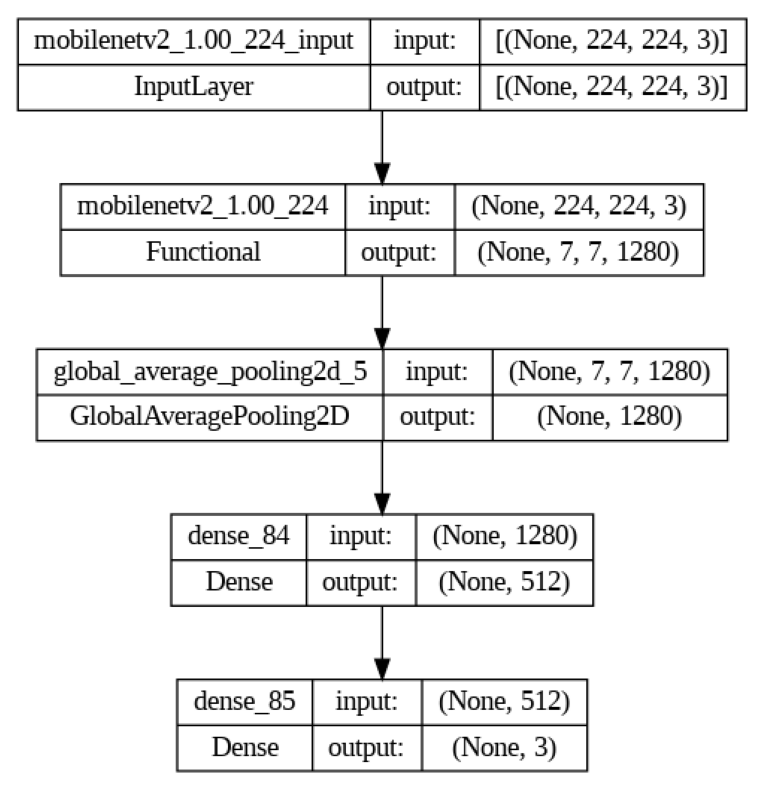

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model from the saved .h5 file
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/work2/Final/Image_Models/sentiment_model.h5')

# Display the model summary
loaded_model.summary()

# Plot the model architecture as a graph
tf.keras.utils.plot_model(loaded_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Show the plot
img = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Function to preprocess a single image
def preprocess_single_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to match MobileNetV2 input
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)  # Preprocess as per MobileNetV2 requirements
    return img

# Load your trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/work2/Final/Image_Models/sentiment_model.h5')

# Provide the path to an image you want to predict
image_path = '/content/gdrive/MyDrive/work2/Final/Frames/2/2_frame_16.jpg'  # Update with the path to your image

# Preprocess the image
preprocessed_image = preprocess_single_image(image_path)

# Make a prediction
predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))

# Decode the prediction to get the sentiment label
sentiment_labels = ['Neutral', 'Positive', 'Negative']
predicted_sentiment = sentiment_labels[np.argmax(predictions)]

# Print the predicted sentiment label
print(f"Predicted Sentiment: {predicted_sentiment}")


1/1 [==============================] - 1s 1s/step
Predicted Sentiment: Positive


In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import os
import pandas as pd

# Function to extract features from audio files
def extract_features(file_path):
y, sr = librosa.load(file_path, duration=3) # Set duration as needed
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
return mfccs



# Folder containing audio files
audio_folder = '/content/gdrive/MyDrive/wav'

# List to store audio file paths and sentiment labels
file_names = []
senti_values = []
# Iterate through files in the folder
for file_name in os.listdir(audio_folder):
# Check if the path is a file (not a subdirectory)
if os.path.isfile(os.path.join('/content/gdrive/MyDrive/wav', file_name)):
file_names.append(audio_folder+'/'+ file_name)
# Print the list of file names
# print("File Names:", file_names)


csv_path = '/content/gdrive/MyDrive/updated_transcriptions_with_senti (1).csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Extract values from the "Senti" column and store them in a list
senti_values = df['Senti'].tolist()

print (file_names)

## Iterate through files in the audio folder

# Create a dataset (X, y) with features and labels
X = np.array([extract_features(path) for path in file_names])
y = np.array(senti_values)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Save the model for later use
model.save('/content/gdrive/MyDrive/Audio_Models/Audio_sentiment_model_AAAA.h5')

# Optionally, load the model for inference
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Audio_Models/Audio_sentiment_model_AAAA.h5')

# Now you can use the loaded_model to make predictions on new data.
# Note: Ensure that the feature extraction process for new data is consistent with the one used during training.

## new

In [ ]:
import pandas as pd

show=pd.read_csv('/content/gdrive/MyDrive/work2/dataset.csv')
show.head(100)

,audio_name,word,start_time,end_time
0,1.wav,پلیز,0,2
1,1.wav,یہ,2,2
2,1.wav,مشہور,2,3
3,1.wav,ترین,3,3
4,1.wav,ہے,3,3
...,...,...,...,...
95,3.wav,غلط,25,25
96,3.wav,ہے,25,25
97,3.wav,اس,25,26
98,3.wav,لیے,26,26
